In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ads_Optimisation.csv")

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for i in range(0,N):
  ad = random.randrange(d)
  ads_selected.append(ad)
  reward = df.values[i, ad]
  total_reward = total_reward + reward


In [5]:
pd.Series(ads_selected).head(1500).value_counts(normalize=True)

2    0.111333
9    0.106000
8    0.102667
4    0.100000
0    0.098000
7    0.098000
5    0.097333
3    0.096667
1    0.096000
6    0.094000
dtype: float64

In [6]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [1]*d
sum_of_reward = [0]*d
total_reward = 0

In [7]:
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if (number_of_selections[i] > 0):
      average_reward = sum_of_reward[i] / number_of_selections[i]
      delta_i = math.sqrt(2 * math.log(n+1) / number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = df.values[n, ad]
  sum_of_reward[ad] += reward
  total_reward += reward

In [8]:
pd.Series(ads_selected).head(1500).value_counts(normalize=True)

4    0.274000
7    0.127333
0    0.123333
3    0.085333
1    0.078667
8    0.078667
6    0.069333
2    0.064667
9    0.054667
5    0.044000
dtype: float64

Text(0, 0.5, 'No. of times each ad was selected by the algorithm')

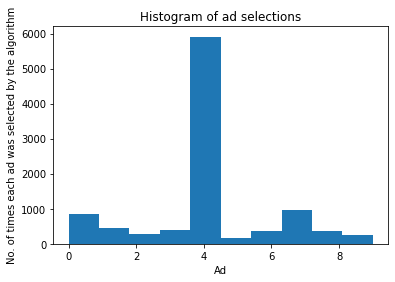

In [11]:
plt.hist(ads_selected)
plt.title("Histogram of ad selections")
plt.xlabel("Ad")
plt.ylabel("No. of times each ad was selected by the algorithm")